In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
import time

from mplsoccer import Pitch, VerticalPitch

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler

In [121]:
frame = pd.read_csv('frame.txt', sep='\t')

In [244]:
new_lines = {
    'team_status':['offense'],
    'x_opta':[105],
    'y_opta':[68],
    'player_with_event':[False]
}
new_lines.keys()

dict_keys(['team_status', 'x_opta', 'y_opta', 'player_with_event'])

In [245]:
frame_event_teste = frame[['team_status', 'x_opta', 'y_opta', 'player_with_event']]
frame_event_teste = frame_event_teste.append(pd.DataFrame(new_lines))

In [246]:
frame_event_teste['x_opta'] = frame_event_teste['x_opta'] * (100/105)
frame_event_teste['y_opta'] = frame_event_teste['y_opta'] * (100/68)

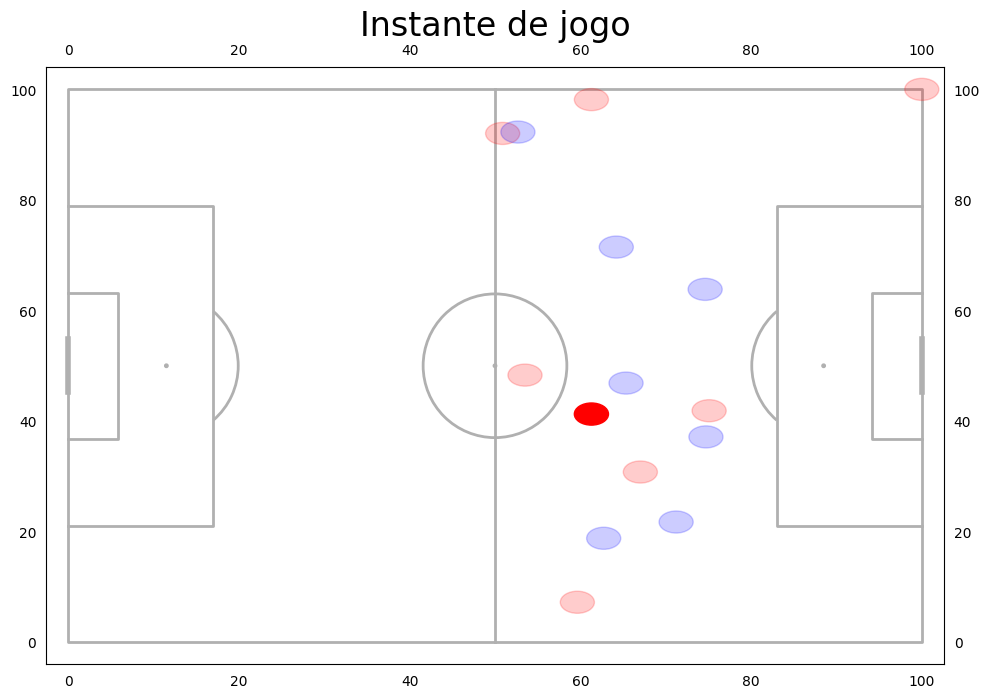

In [247]:
pitch = Pitch(pitch_type='opta',  # example plotting a tracab pitch
              axis=True, label=True, pitch_length=100, pitch_width=100) 
fig, ax = pitch.draw(figsize=(10, 7))

'''x = event_test['start_x'].values[0]
y = event_test['start_y'].values[0]
id_person = event_test['player_id'].values[0]
name_person = event_test['player_name'].values[0]

circle = plt.Circle((x,y),2,color="blue")
circle.set_alpha(1)
ax.add_patch(circle)'''
ofdef_color = {
    'offense':'red',
    'defense':'blue'
}

for i,person in frame_event_teste.iterrows():
    #if pass made by Lucy Bronze
    col = ofdef_color[person['team_status']]
    if person['player_with_event'] == True:
        x=person['x_opta']
        y=person['y_opta']
        #plot circle
        
        circle = plt.Circle((x,y),2,color=col)
        circle.set_alpha(1)
        ax.add_patch(circle)
    else:
        x=person['x_opta']
        y=person['y_opta']
        #plot circle
        circle = plt.Circle((x,y),2,color=col)
        circle.set_alpha(.2)
        ax.add_patch(circle)

ax.set_title("Instante de jogo", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

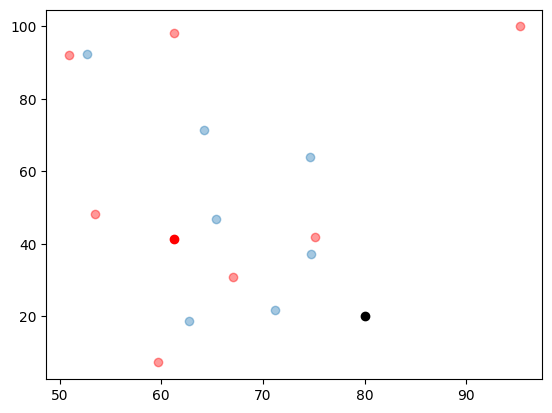

In [222]:
offense = frame_event_teste.query("team_status == 'offense' and not player_with_event")
defense = frame_event_teste.query("team_status == 'defense'")
active = frame_event_teste.query("team_status == 'offense' and player_with_event")
active_xy = (active['x_opta'].sum(), active['y_opta'].sum())
receptor = (80,20)
plt.scatter(active['x_opta'], active['y_opta'], c='r', alpha=1)
plt.scatter(receptor[0], receptor[1], c='k', alpha=1)
plt.scatter(offense['x_opta'], offense['y_opta'], c='r', alpha=0.4)
plt.scatter(defense['x_opta'], defense['y_opta'], alpha=0.4)

In [223]:
receptor = np.array(receptor)
active_xy = np.array(active_xy)

In [224]:
defense['dist'] = defense.apply(lambda x: np.sqrt((x.x_opta - active_xy[0])**2 + (x.y_opta - active_xy[1])**2), axis=1)

C:\Users\gabriel.rbarbosa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
                                                            # PRM
defense['angle'] = defense.apply(lambda row: np.degrees(np.arccos(np.dot((receptor - active_xy), (np.array([row['x_opta'], row['y_opta']]) - active_xy))
                                                        / (np.linalg.norm(receptor - active_xy) * np.linalg.norm(np.array([row['x_opta'], row['y_opta']]) - active_xy)))),
                       axis=1)

# defense['angle'] = defense.apply(lambda row: np.degrees(np.arccos(np.dot((receptor - np.array([row['x_opta'], row['y_opta']])), (active_xy - np.array([row['x_opta'], row['y_opta']])))
#                                                         / (np.linalg.norm(receptor - np.array([row['x_opta'], row['y_opta']])) * np.linalg.norm(active_xy - np.array([row['x_opta'], row['y_opta']]))))),
#                        axis=1)

C:\Users\gabriel.rbarbosa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


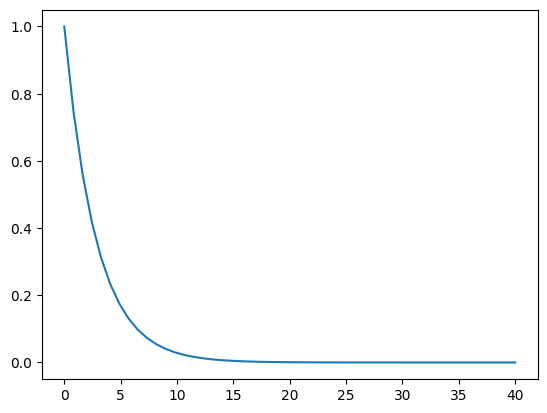

In [226]:
x = np.linspace(0,40)
plt.plot(x, 0.7**x)

In [236]:
defense['peso_defesa'] = defense.apply(lambda row: (180-row.angle)*(0.7**row.dist), axis=1)
defense['peso_defesa'] = defense['peso_defesa'] * 100

C:\Users\gabriel.rbarbosa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gabriel.rbarbosa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
defense

,team_status,x_opta,y_opta,player_with_event,dist,angle,peso_defesa
5,defense,74.619048,63.823529,False,26.199703,108.097476,0.628578
6,defense,62.733333,18.794118,False,22.516560,37.673476,4.628355
7,defense,74.714286,37.132353,False,14.040911,31.548596,99.224675
9,defense,71.219048,21.735294,False,21.906162,14.398097,6.695114
11,defense,64.209524,71.470588,False,30.346143,133.153764,0.093325
12,defense,52.685714,92.279412,False,51.736101,148.243933,0.000031
13,defense,65.352381,46.867647,False,6.917612,102.755991,655.108330


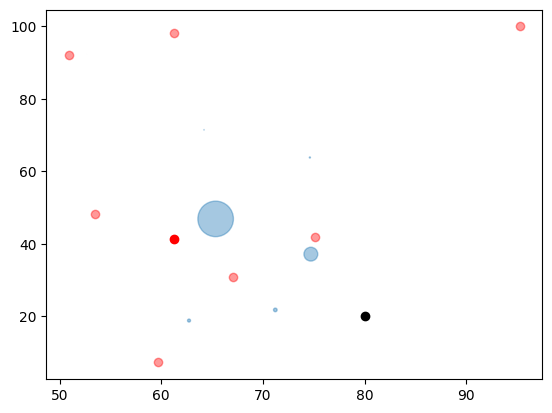

In [239]:
plt.scatter(active['x_opta'], active['y_opta'], c='r', alpha=1)
plt.scatter(receptor[0], receptor[1], c='k', alpha=1)
plt.scatter(offense['x_opta'], offense['y_opta'], c='r', alpha=0.4)
plt.scatter(defense['x_opta'], defense['y_opta'], alpha=0.4, s=defense['peso_defesa'])

In [71]:
def get_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return angle

In [178]:
import numpy as np

a = np.array([80,20])
b = np.array([61.2952381 , 41.26470588])
c = np.array([71.219048,	21.735294	])

a = np.array([1,0])
b =   np.array([0 , 0])
c =np.array([-1 , -0.1])

ba = a - b
bc = c - b

cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
angle = np.arccos(cosine_angle)

print (np.degrees(angle))

174.28940686250044


In [179]:
active_xy

array([61.2952381 , 41.26470588])

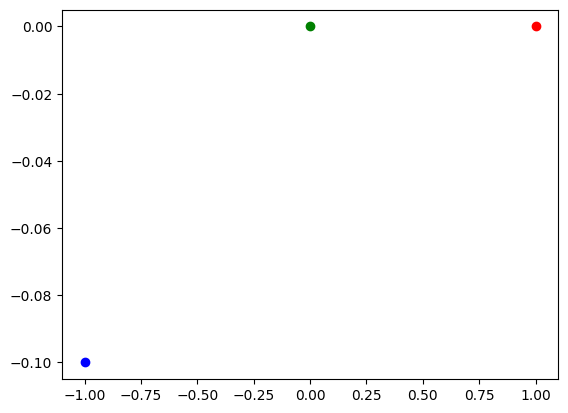

In [180]:
plt.scatter(a[0], a[1], c='r')
plt.scatter(b[0], b[1], c='g')
plt.scatter(c[0], c[1], c='b')

In [97]:
import numpy as np
import pandas as pd

# Define the two points
point1 = np.array([0, 1])
point2 = np.array([3, 4])

# Example dataframe
df = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 3, 1]})

# Calculate the angle in degrees for each point in the dataframe
df['angle'] = df.apply(lambda row: np.degrees(np.arccos(np.dot((point2 - point1), (np.array([row['x'], row['y']]) - point1))
                                                        / (np.linalg.norm(point2 - point1) * np.linalg.norm(np.array([row['x'], row['y']]) - point1)))),
                       axis=1)

# Print the dataframe
print(df)

   x  y  angle
0  1  2    0.0
1  2  3    0.0
2  3  1   45.0
